In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:

file_path = 'songs_normalize.csv'
df = pd.read_csv(file_path)



In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [7]:
df.shape

(2000, 18)

In [8]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [9]:

input_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'tempo']
output_feature = 'popularity'

In [10]:

X = df[input_features]
y = df[output_feature]


In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

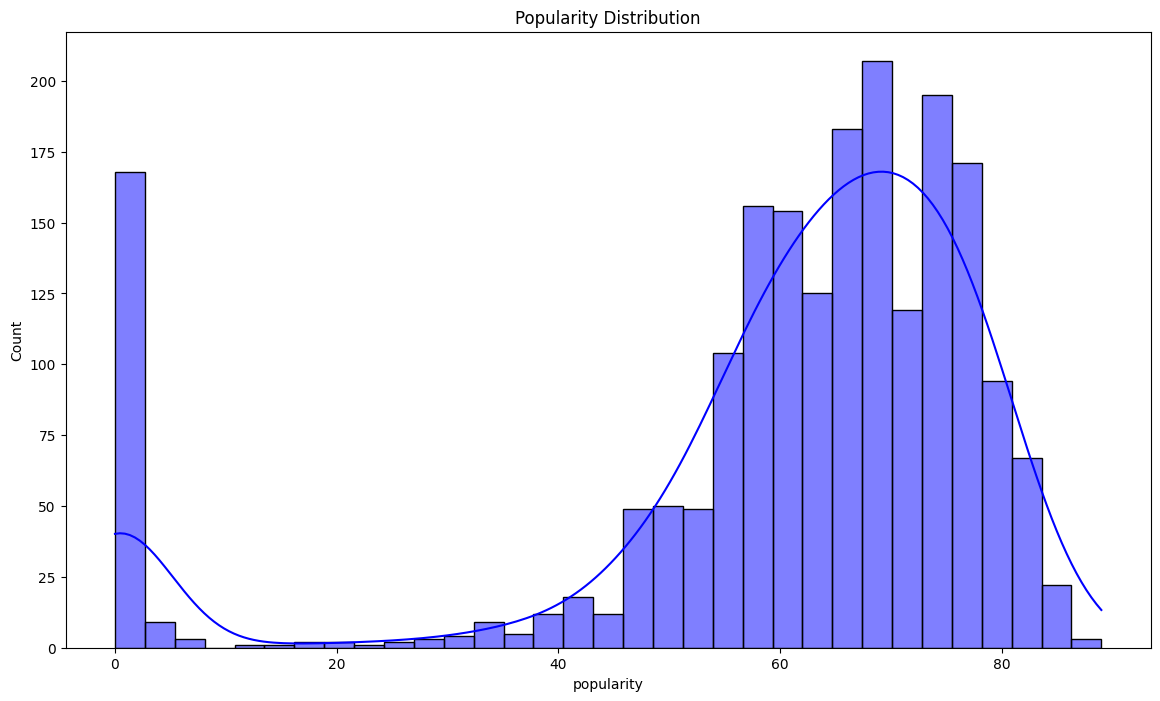

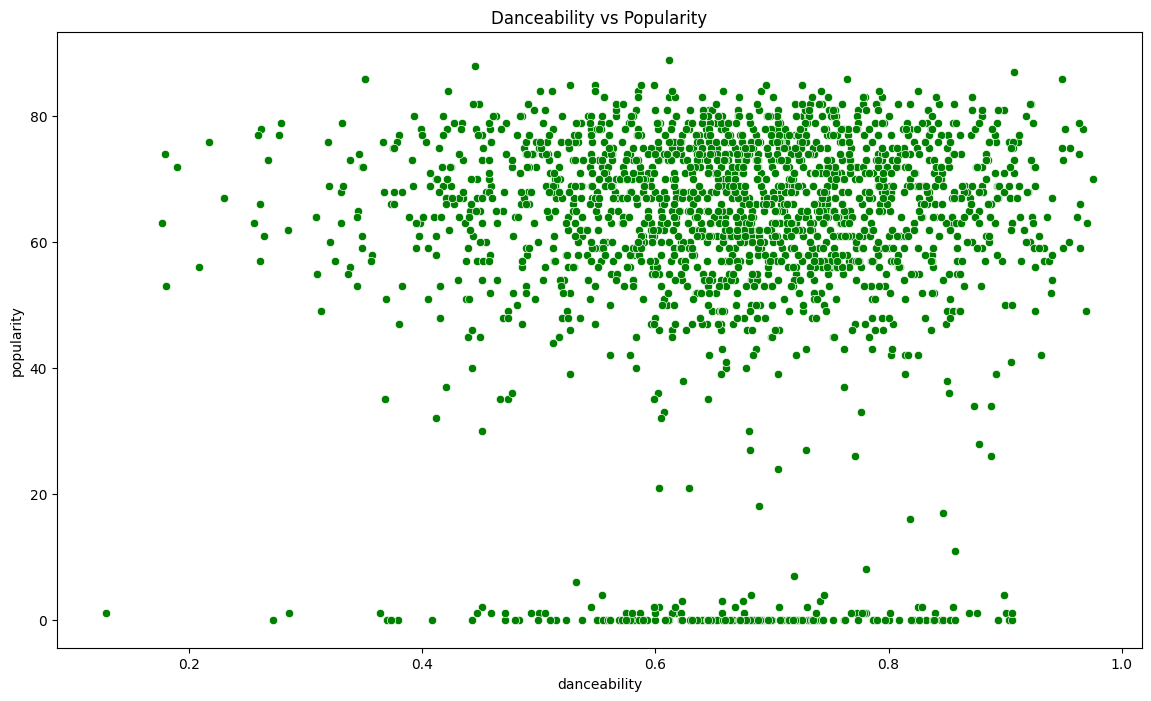

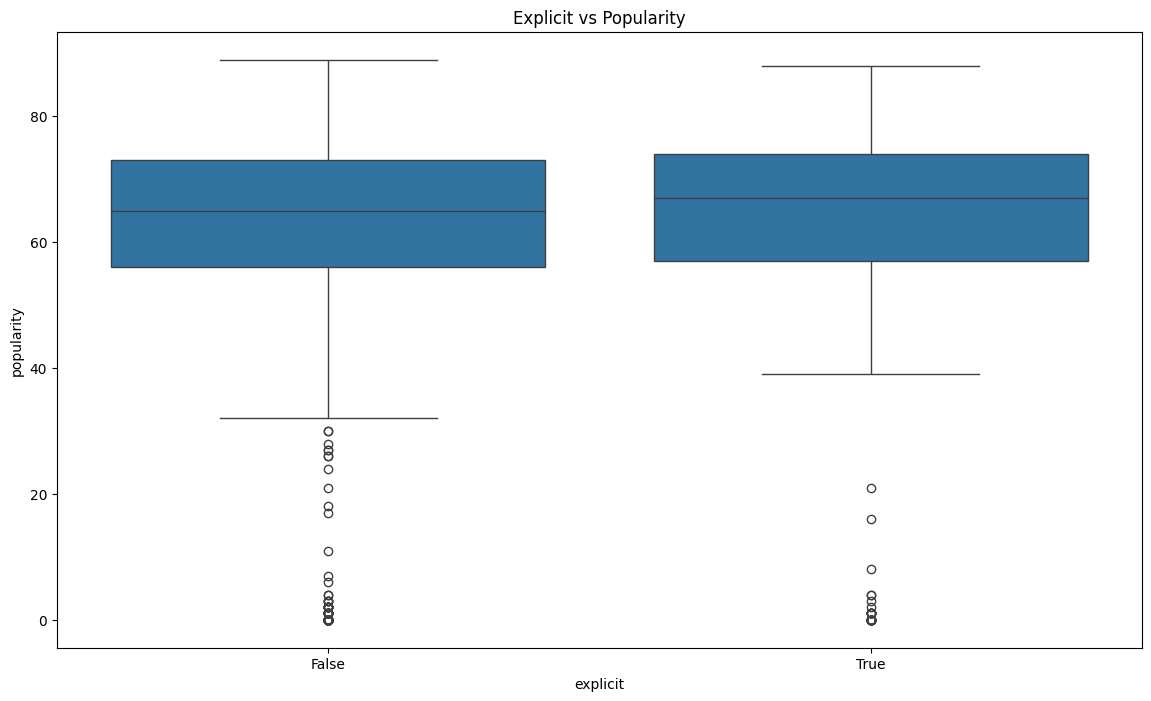

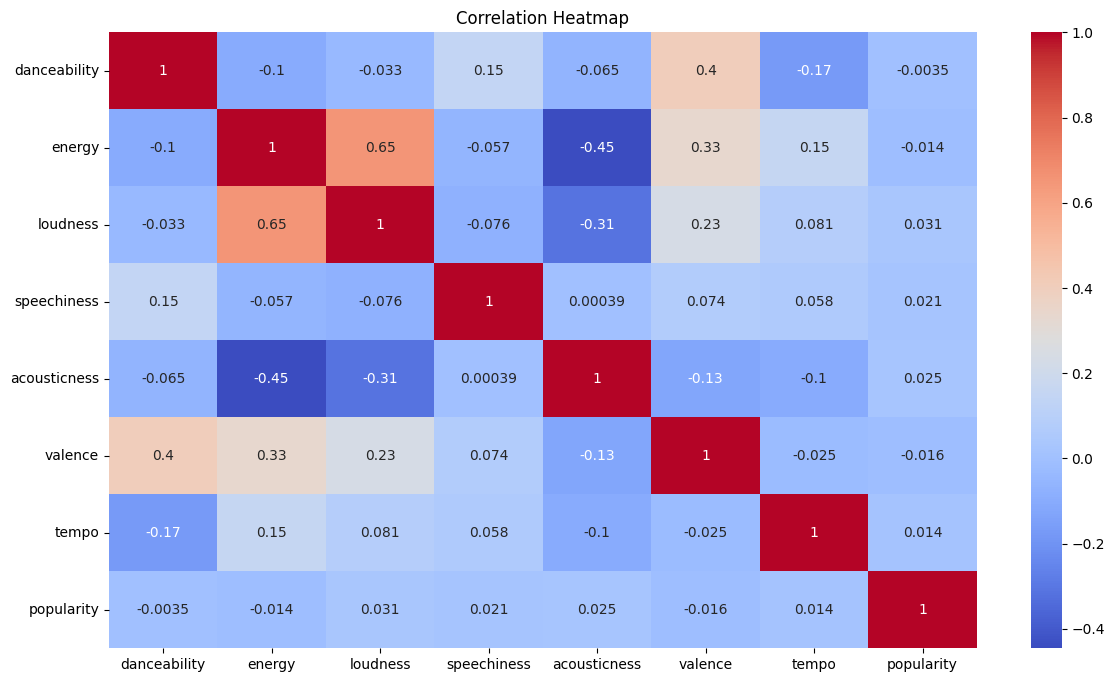

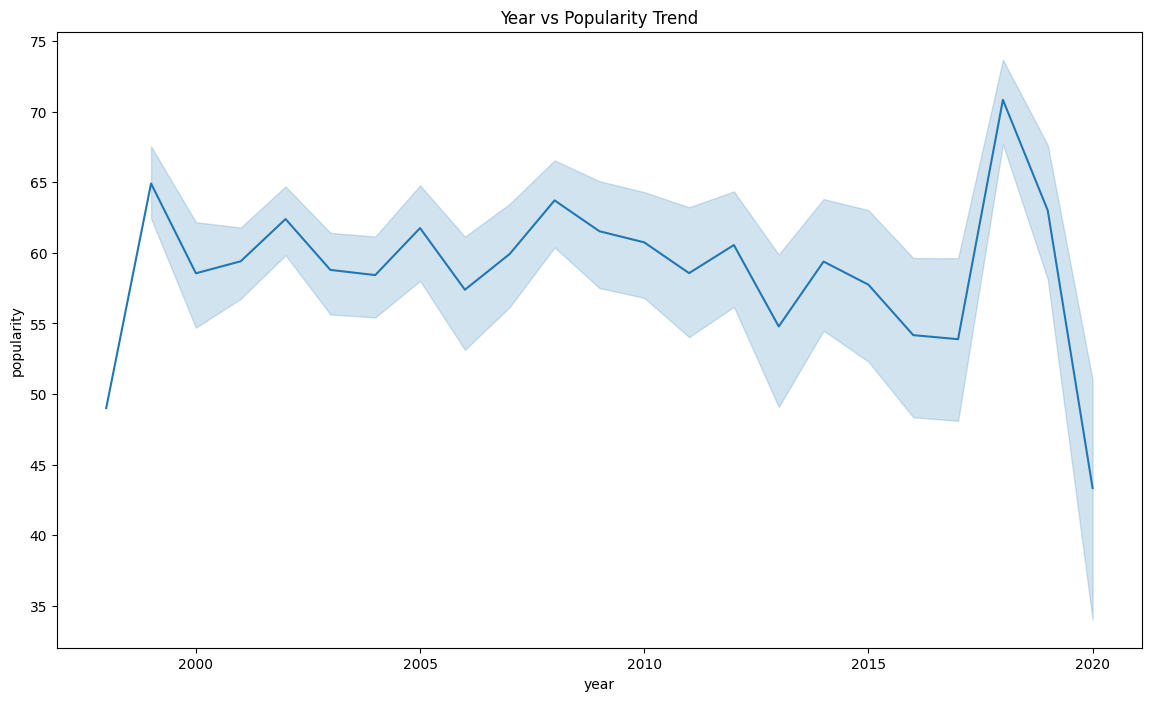

In [12]:

plt.figure(figsize=(14, 8))
sns.histplot(df['popularity'], kde=True, color='blue')
plt.title('Popularity Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.scatterplot(x='danceability', y='popularity', data=df, color='green')
plt.title('Danceability vs Popularity')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Explicit vs Popularity')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(df[input_features + [output_feature]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='popularity', data=df)
plt.title('Year vs Popularity Trend')
plt.show()

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#   'Linear Regression'
#  'Decision Tree'
# 'Random Forest'

In [14]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

best_model = None
best_score = float('-inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R2 Score: {score:.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
    
    if score > best_score:
        best_score = score
        best_model = model



Linear Regression R2 Score: 0.0051, MSE: 476.5619
Decision Tree R2 Score: -1.0640, MSE: 988.6800
Random Forest R2 Score: -0.0437, MSE: 499.9637


In [15]:

joblib.dump(best_model, 'best_model.pkl')

best_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from flask import Flask, render_template, request
import numpy as np
import joblib
import matplotlib.pyplot as plt
import os

app = Flask(__name__)

# Load the trained model
model = joblib.load('best_model.pkl')

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/description')
def description():
    return render_template('description.html')

@app.route('/detect', methods=['GET', 'POST'])
def detect():
    if request.method == 'POST':
       
        danceability = float(request.form['danceability'])
        energy = float(request.form['energy'])
        loudness = float(request.form['loudness'])
        speechiness = float(request.form['speechiness'])
        acousticness = float(request.form['acousticness'])
        valence = float(request.form['valence'])
        tempo = float(request.form['tempo'])

        
        input_data = np.array([[danceability, energy, loudness, speechiness, acousticness, valence, tempo]])

        
        prediction = model.predict(input_data)[0]

        return render_template('result.html', prediction=prediction)

    return render_template('detect.html')


@app.route('/dashboard')
def dashboard():
    # Sample data
    data = [0.6, 0.7, 0.9, 0.4, 0.8]
    labels = ['Song A', 'Song B', 'Song C', 'Song D', 'Song E']

   
    plt.figure(figsize=(6, 4))
    plt.bar(labels, data, color='skyblue')
    plt.title('Music Popularity Comparison')
    plt.savefig('static/bar_chart.png')
    plt.close()

    plt.figure(figsize=(6, 4))
    plt.plot(labels, data, marker='o', color='lightcoral')
    plt.title('Trend Progression Over Time')
    plt.savefig('static/line_chart.png')
    plt.close()

    return render_template('dashboard.html')


@app.route('/contact')
def contact():
    return render_template('contact.html')

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [09/Dec/2025 11:03:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2025 11:03:11] "GET /static/inp1.gif HTTP/1.1" 304 -
127.0.0.1 - - [09/Dec/2025 11:03:12] "GET /favicon.ico HTTP/1.1" 404 -
